In [272]:
import pandas as pd 
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [295]:
df = quandl.get('WIKI/GOOGL') 
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Close'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(len(df))

3424


In [274]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)




X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [275]:
df.dropna(inplace=True)
y = np.array(df['label'])
print(len(X),len(y))

3389 3389


In [276]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

#linear regression
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9782312977097682


In [277]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)
df['Forecast'] = np.nan

[1105.21528356 1074.19480748 1021.83778964 1062.98839649 1074.53195164
 1074.80130398 1093.73891412 1112.60568115 1116.16894851 1124.53580239
 1134.1360489  1130.719744   1150.0420119  1165.76685735 1137.47788311
 1123.81510934 1089.79110271 1105.19050826 1116.04913069 1122.30835986
 1136.82193387 1151.20930783 1182.96602475 1187.36315516 1159.53408296
 1170.24664571 1172.06771228 1154.64829672 1119.91958345 1116.33327934
 1114.54234524 1071.63416325 1044.55051486 1074.2424389  1023.26197665] 0.9782312977097682 35


In [278]:
last_date = df.iloc[-1].name # gets the date of the last
print(last_date)
last_unix = last_date.timestamp() #seconds between 1970 and the lastdate
print(last_unix)
one_day = 86400 # seconds in one day
next_unix = last_unix + one_day
#print(next_unix)

2018-02-05 00:00:00
1517788800.0


In [293]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)# the date after 1970 + next_unix seconds
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] #insert the new date as index and NaN for all features except forecast and there inserts the prediccion of the last 35 days

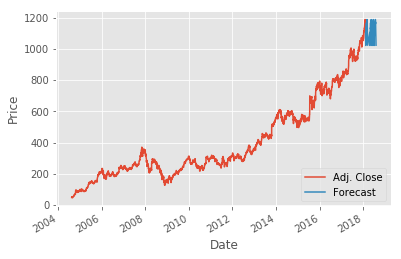

In [294]:
#'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [282]:
d = [1,2,3,4,5,6,7,8,9]
d[:-4]

[1, 2, 3, 4, 5]